# A Collection of Signal Analysis Tutorials

## Butterworth Bandpass Tutorial

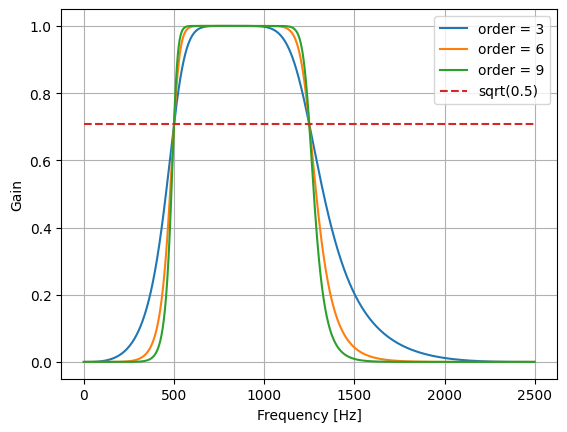

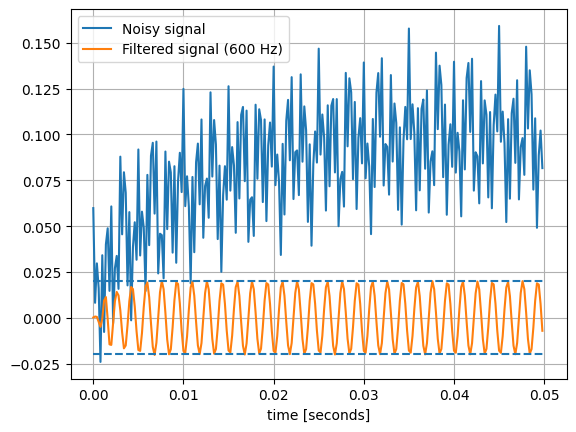

In [1]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a  = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000.0
    lowcut = 500.0
    highcut = 1250.0
    
    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label='order = %d' % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time [seconds]')
    plt.hlines([-a, a], 0, T, linestyles = '--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
    plt.show()

run()

## MRI with EEG 

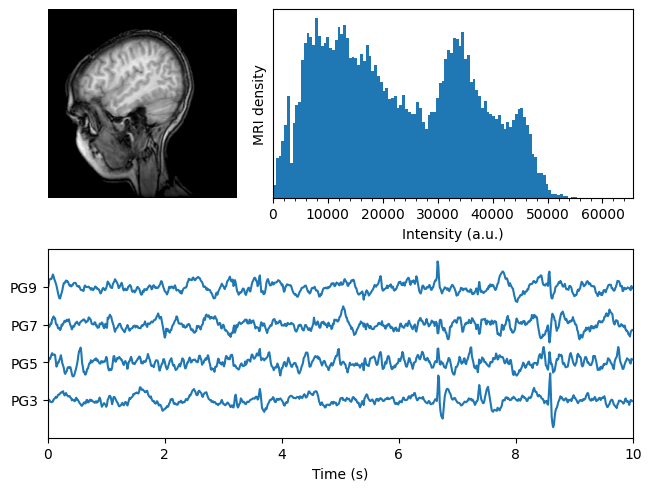

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

fg, axd = plt.subplot_mosaic(
    [["image", "density"], 
     ["EEG", "EEG"]],
    layout="constrained",
    # "image" will contain a square image. 
    # We fine-tune the width so that there is no excess vertical or 
    # horizontal margin around the image.
    width_ratios=[1.05, 2],
)

# Load the MRI data (256x256 16-bit integers)
with cbook.get_sample_data('s1045.ima.gz') as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))
    
# Plot the MRI image
axd["image"].imshow(im, cmap="gray")
axd["image"].axis('off')

# Plot the histogram of MRI intensity
im = im[im.nonzero()] # Ignore the background
axd["density"].hist(im, bins=np.arange(0, 2**16+1, 512))
axd["density"].set(xlabel='Intensity (a.u.)', xlim=(0, 2**16),
                   ylabel='MRI density', yticks=[])
axd['density'].minorticks_on()

# Load the EEG data
n_samples, n_rows = 800, 4
with cbook.get_sample_data('eeg.dat') as eegfile:
    data=np.fromfile(eegfile, dtype=float).reshape((n_samples, n_rows))
t = 10 * np.arange(n_samples) / n_samples

# Plot the EEG
axd["EEG"].set_xlabel('Time (s)')
axd["EEG"].set_xlim(0, 10)
dy = (data.min() - data.max()) * 0.7 
axd["EEG"].set_ylim(-dy, n_rows * dy)
axd["EEG"].set_yticks([0, dy, 2*dy, 3*dy], labels=['PG3', 'PG5', 'PG7', 'PG9'])

for i, data_col in enumerate(data.T):
    axd["EEG"].plot(t, data_col + i*dy, color="C0")
plt.show()

In [10]:
import pandas as pd


,0,1,2,3
count,800.000000,8.000000e+02,8.000000e+02,800.000000
mean,-0.000468,-6.812951e-07,-2.322508e-07,-0.000003
std,0.998325,9.999980e-01,9.999995e-01,0.999995
min,-5.187366,-2.994268e+00,-3.563694e+00,-4.977363
25%,-0.483383,-7.085657e-01,-6.342902e-01,-0.610007
50%,-0.004817,2.743869e-02,-1.858210e-02,0.040127
75%,0.537986,6.483288e-01,6.038807e-01,0.659830
max,5.288712,2.730284e+00,3.454172e+00,2.904948


In [32]:
eeg_signal = data.T[0]

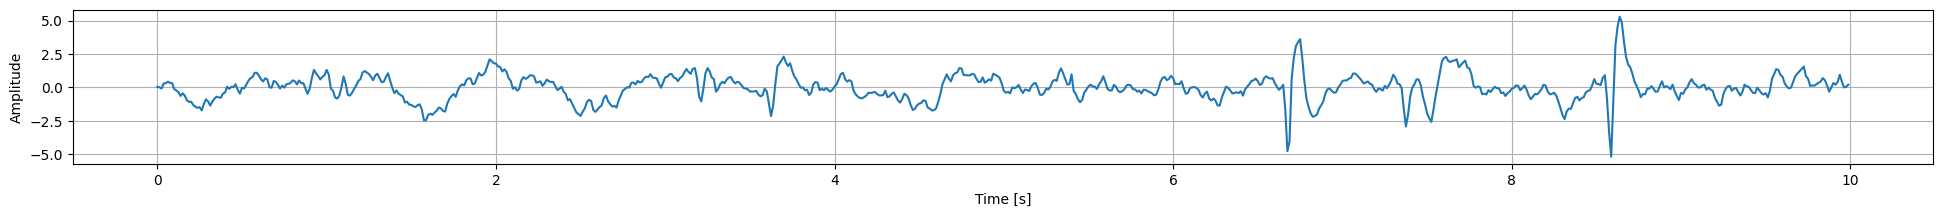

In [31]:
plt.figure(figsize=(24,2))
plt.plot(t, data.T[0])
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
eeg_signal_fft = np.fft.fft(eeg_signal)
eeg_sign_fft_freq_bins = np.arange(0, )

In [11]:
pd.DataFrame(data).T.describe()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.051232,-0.009336,-0.428644,-0.422061,-0.621372,-0.685507,-1.106293,-1.208713,-1.338043,-1.110568,...,0.217556,0.301093,0.233578,0.265071,0.477131,0.648994,0.787614,0.579471,0.092103,0.232676
std,0.022331,0.098951,0.758886,0.828287,0.843907,0.971576,1.039376,1.136760,0.848034,0.614104,...,0.536998,0.664362,0.795318,0.844989,1.023757,0.973429,1.026577,0.634640,0.801944,0.662372
min,0.036999,-0.106232,-1.288126,-1.502505,-1.599416,-1.550390,-1.929698,-2.433025,-2.114984,-1.541897,...,-0.316149,-0.350833,-0.793918,-0.624636,-0.555895,-0.403932,0.024290,0.000496,-0.683671,-0.579883
25%,0.039320,-0.074971,-0.904332,-0.851851,-1.141091,-1.473815,-1.824054,-1.703099,-1.734776,-1.524087,...,-0.160108,-0.092692,-0.011374,-0.100931,-0.004534,0.049774,0.302350,0.185337,-0.314743,0.009066
50%,0.041713,-0.024820,-0.432701,-0.238925,-0.601274,-0.808884,-1.418047,-1.356924,-1.552794,-1.335747,...,0.155024,0.179792,0.291348,0.137697,0.289652,0.574678,0.411693,0.432784,-0.077648,0.234527
75%,0.053625,0.040814,0.042987,0.190866,-0.081555,-0.020576,-0.700286,-0.862537,-1.156060,-0.922228,...,0.532689,0.573577,0.536300,0.503699,0.771318,1.173897,0.896957,0.826918,0.329198,0.458137
max,0.084504,0.118527,0.438952,0.292111,0.316474,0.426130,0.340620,0.312021,-0.131599,-0.228880,...,0.876325,1.195620,1.145534,1.409528,1.885115,1.850551,2.302781,1.451819,1.207379,1.041534
